## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9680815	total: 52.2ms	remaining: 52.1s


1:	learn: 0.9358094	total: 52.9ms	remaining: 26.4s
2:	learn: 0.9080403	total: 53.1ms	remaining: 17.7s
3:	learn: 0.8777549	total: 53.9ms	remaining: 13.4s
4:	learn: 0.8525748	total: 54.2ms	remaining: 10.8s
5:	learn: 0.8246278	total: 54.8ms	remaining: 9.08s
6:	learn: 0.8017917	total: 55.1ms	remaining: 7.81s
7:	learn: 0.7787065	total: 55.6ms	remaining: 6.9s
8:	learn: 0.7527048	total: 56.2ms	remaining: 6.19s
9:	learn: 0.7286639	total: 57.1ms	remaining: 5.65s
10:	learn: 0.7057690	total: 57.7ms	remaining: 5.19s
11:	learn: 0.6828907	total: 58.2ms	remaining: 4.79s
12:	learn: 0.6641517	total: 59ms	remaining: 4.48s
13:	learn: 0.6447669	total: 59.6ms	remaining: 4.2s
14:	learn: 0.6244429	total: 59.9ms	remaining: 3.93s
15:	learn: 0.6060563	total: 60.4ms	remaining: 3.72s
16:	learn: 0.5870545	total: 61ms	remaining: 3.52s
17:	learn: 0.5690027	total: 61.4ms	remaining: 3.35s
18:	learn: 0.5530104	total: 61.7ms	remaining: 3.19s
19:	learn: 0.5395007	total: 62.1ms	remaining: 3.04s
20:	learn: 0.5224483	total:

168:	learn: 0.0450828	total: 147ms	remaining: 723ms
169:	learn: 0.0448870	total: 148ms	remaining: 723ms
170:	learn: 0.0446565	total: 149ms	remaining: 721ms
171:	learn: 0.0444378	total: 149ms	remaining: 718ms
172:	learn: 0.0442658	total: 150ms	remaining: 716ms
173:	learn: 0.0440645	total: 150ms	remaining: 713ms
174:	learn: 0.0438606	total: 151ms	remaining: 711ms
175:	learn: 0.0436982	total: 151ms	remaining: 708ms
176:	learn: 0.0434610	total: 152ms	remaining: 706ms
177:	learn: 0.0432853	total: 152ms	remaining: 704ms
178:	learn: 0.0431541	total: 153ms	remaining: 702ms
179:	learn: 0.0429777	total: 153ms	remaining: 699ms
180:	learn: 0.0428069	total: 154ms	remaining: 697ms
181:	learn: 0.0425620	total: 155ms	remaining: 694ms
182:	learn: 0.0424330	total: 155ms	remaining: 692ms
183:	learn: 0.0421857	total: 155ms	remaining: 689ms
184:	learn: 0.0420635	total: 156ms	remaining: 685ms
185:	learn: 0.0418834	total: 156ms	remaining: 683ms
186:	learn: 0.0417444	total: 156ms	remaining: 680ms
187:	learn: 

232:	learn: 0.0354074	total: 193ms	remaining: 635ms
233:	learn: 0.0353006	total: 194ms	remaining: 634ms
234:	learn: 0.0351689	total: 195ms	remaining: 636ms
235:	learn: 0.0350894	total: 197ms	remaining: 636ms
236:	learn: 0.0349940	total: 197ms	remaining: 635ms
237:	learn: 0.0348209	total: 198ms	remaining: 633ms
238:	learn: 0.0347159	total: 199ms	remaining: 632ms
239:	learn: 0.0346341	total: 199ms	remaining: 630ms
240:	learn: 0.0345221	total: 200ms	remaining: 629ms
241:	learn: 0.0344579	total: 200ms	remaining: 627ms
242:	learn: 0.0343291	total: 201ms	remaining: 625ms
243:	learn: 0.0340712	total: 202ms	remaining: 625ms
244:	learn: 0.0339974	total: 203ms	remaining: 625ms
245:	learn: 0.0339108	total: 203ms	remaining: 623ms
246:	learn: 0.0337629	total: 204ms	remaining: 622ms
247:	learn: 0.0337009	total: 205ms	remaining: 621ms
248:	learn: 0.0336297	total: 206ms	remaining: 621ms
249:	learn: 0.0335742	total: 207ms	remaining: 620ms
250:	learn: 0.0334639	total: 207ms	remaining: 618ms
251:	learn: 

399:	learn: 0.0233900	total: 294ms	remaining: 441ms
400:	learn: 0.0233653	total: 295ms	remaining: 441ms
401:	learn: 0.0233295	total: 296ms	remaining: 440ms
402:	learn: 0.0232936	total: 296ms	remaining: 439ms
403:	learn: 0.0232097	total: 297ms	remaining: 438ms
404:	learn: 0.0231701	total: 297ms	remaining: 436ms
405:	learn: 0.0230878	total: 298ms	remaining: 436ms
406:	learn: 0.0230349	total: 299ms	remaining: 435ms
407:	learn: 0.0230035	total: 299ms	remaining: 434ms
408:	learn: 0.0229669	total: 299ms	remaining: 432ms
409:	learn: 0.0229153	total: 299ms	remaining: 431ms
410:	learn: 0.0228827	total: 300ms	remaining: 430ms
411:	learn: 0.0228589	total: 300ms	remaining: 429ms
412:	learn: 0.0228232	total: 301ms	remaining: 428ms
413:	learn: 0.0227581	total: 301ms	remaining: 427ms
414:	learn: 0.0227211	total: 302ms	remaining: 426ms
415:	learn: 0.0227010	total: 302ms	remaining: 425ms
416:	learn: 0.0226676	total: 303ms	remaining: 424ms
417:	learn: 0.0226432	total: 304ms	remaining: 423ms
418:	learn: 

454:	learn: 0.0213596	total: 334ms	remaining: 400ms
455:	learn: 0.0213422	total: 335ms	remaining: 400ms
456:	learn: 0.0213110	total: 335ms	remaining: 399ms
457:	learn: 0.0212874	total: 336ms	remaining: 398ms
458:	learn: 0.0212504	total: 337ms	remaining: 397ms
459:	learn: 0.0212275	total: 338ms	remaining: 396ms
460:	learn: 0.0211601	total: 338ms	remaining: 395ms
461:	learn: 0.0211223	total: 339ms	remaining: 395ms
462:	learn: 0.0210642	total: 340ms	remaining: 394ms
463:	learn: 0.0210344	total: 340ms	remaining: 393ms
464:	learn: 0.0210088	total: 341ms	remaining: 393ms
465:	learn: 0.0209901	total: 342ms	remaining: 392ms
466:	learn: 0.0209651	total: 343ms	remaining: 392ms
467:	learn: 0.0209425	total: 344ms	remaining: 391ms
468:	learn: 0.0209039	total: 344ms	remaining: 390ms
469:	learn: 0.0208684	total: 345ms	remaining: 389ms
470:	learn: 0.0208042	total: 346ms	remaining: 388ms
471:	learn: 0.0207677	total: 346ms	remaining: 387ms
472:	learn: 0.0207083	total: 347ms	remaining: 387ms
473:	learn: 

606:	learn: 0.0177622	total: 446ms	remaining: 289ms
607:	learn: 0.0177493	total: 447ms	remaining: 288ms
608:	learn: 0.0177376	total: 448ms	remaining: 287ms
609:	learn: 0.0177202	total: 448ms	remaining: 287ms
610:	learn: 0.0176979	total: 449ms	remaining: 286ms
611:	learn: 0.0176926	total: 450ms	remaining: 285ms
612:	learn: 0.0176617	total: 450ms	remaining: 284ms
613:	learn: 0.0176440	total: 451ms	remaining: 284ms
614:	learn: 0.0176282	total: 452ms	remaining: 283ms
615:	learn: 0.0176134	total: 453ms	remaining: 283ms
616:	learn: 0.0175903	total: 454ms	remaining: 282ms
617:	learn: 0.0175353	total: 455ms	remaining: 281ms
618:	learn: 0.0175241	total: 456ms	remaining: 281ms
619:	learn: 0.0175132	total: 457ms	remaining: 280ms
620:	learn: 0.0175083	total: 457ms	remaining: 279ms
621:	learn: 0.0174977	total: 458ms	remaining: 278ms
622:	learn: 0.0174809	total: 460ms	remaining: 278ms
623:	learn: 0.0174772	total: 460ms	remaining: 277ms
624:	learn: 0.0174652	total: 461ms	remaining: 277ms
625:	learn: 

660:	learn: 0.0167605	total: 488ms	remaining: 250ms
661:	learn: 0.0167465	total: 488ms	remaining: 249ms
662:	learn: 0.0167313	total: 489ms	remaining: 249ms
663:	learn: 0.0167222	total: 490ms	remaining: 248ms
664:	learn: 0.0167069	total: 491ms	remaining: 247ms
665:	learn: 0.0166925	total: 491ms	remaining: 246ms
666:	learn: 0.0166792	total: 492ms	remaining: 245ms
667:	learn: 0.0166713	total: 492ms	remaining: 245ms
668:	learn: 0.0166616	total: 492ms	remaining: 244ms
669:	learn: 0.0166497	total: 493ms	remaining: 243ms
670:	learn: 0.0166433	total: 493ms	remaining: 242ms
671:	learn: 0.0166291	total: 494ms	remaining: 241ms
672:	learn: 0.0166160	total: 494ms	remaining: 240ms
673:	learn: 0.0166010	total: 495ms	remaining: 239ms
674:	learn: 0.0165889	total: 495ms	remaining: 238ms
675:	learn: 0.0165697	total: 496ms	remaining: 238ms
676:	learn: 0.0165583	total: 496ms	remaining: 237ms
677:	learn: 0.0165306	total: 497ms	remaining: 236ms
678:	learn: 0.0165184	total: 498ms	remaining: 235ms
679:	learn: 

825:	learn: 0.0144373	total: 597ms	remaining: 126ms
826:	learn: 0.0144307	total: 598ms	remaining: 125ms
827:	learn: 0.0144177	total: 599ms	remaining: 124ms
828:	learn: 0.0144084	total: 599ms	remaining: 124ms
829:	learn: 0.0143993	total: 600ms	remaining: 123ms
830:	learn: 0.0143880	total: 600ms	remaining: 122ms
831:	learn: 0.0143797	total: 601ms	remaining: 121ms
832:	learn: 0.0143713	total: 601ms	remaining: 121ms
833:	learn: 0.0143651	total: 601ms	remaining: 120ms
834:	learn: 0.0143584	total: 602ms	remaining: 119ms
835:	learn: 0.0143481	total: 602ms	remaining: 118ms
836:	learn: 0.0143339	total: 603ms	remaining: 117ms
837:	learn: 0.0143235	total: 604ms	remaining: 117ms
838:	learn: 0.0143018	total: 604ms	remaining: 116ms
839:	learn: 0.0142882	total: 604ms	remaining: 115ms
840:	learn: 0.0142837	total: 605ms	remaining: 114ms
841:	learn: 0.0142706	total: 606ms	remaining: 114ms
842:	learn: 0.0142648	total: 606ms	remaining: 113ms
843:	learn: 0.0142541	total: 607ms	remaining: 112ms
844:	learn: 

900:	learn: 0.0136742	total: 638ms	remaining: 70.1ms
901:	learn: 0.0136660	total: 640ms	remaining: 69.5ms
902:	learn: 0.0136563	total: 641ms	remaining: 68.8ms
903:	learn: 0.0136482	total: 641ms	remaining: 68ms
904:	learn: 0.0136292	total: 641ms	remaining: 67.3ms
905:	learn: 0.0136211	total: 642ms	remaining: 66.6ms
906:	learn: 0.0136037	total: 642ms	remaining: 65.8ms
907:	learn: 0.0135947	total: 643ms	remaining: 65.1ms
908:	learn: 0.0135871	total: 643ms	remaining: 64.4ms
909:	learn: 0.0135726	total: 644ms	remaining: 63.7ms
910:	learn: 0.0135603	total: 644ms	remaining: 63ms
911:	learn: 0.0135483	total: 645ms	remaining: 62.2ms
912:	learn: 0.0135435	total: 645ms	remaining: 61.5ms
913:	learn: 0.0135118	total: 646ms	remaining: 60.8ms
914:	learn: 0.0135010	total: 646ms	remaining: 60.1ms
915:	learn: 0.0134975	total: 647ms	remaining: 59.3ms
916:	learn: 0.0134906	total: 648ms	remaining: 58.6ms
917:	learn: 0.0134728	total: 648ms	remaining: 57.9ms
918:	learn: 0.0134652	total: 649ms	remaining: 57.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.02620627224258236
ABC Pre-generator MAE 0.9986708117013507


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

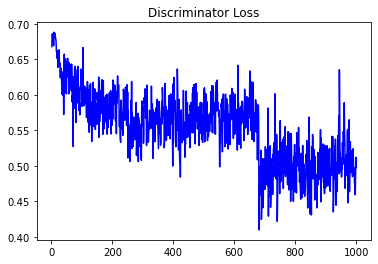

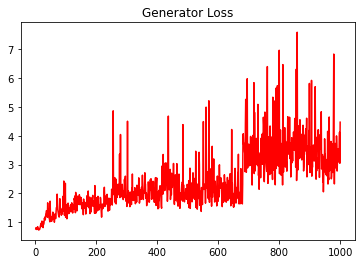

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.10297106328529197


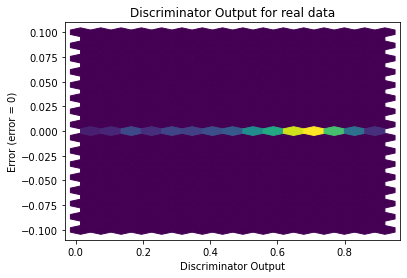

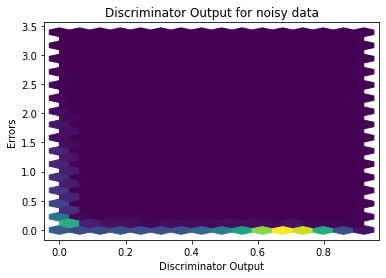

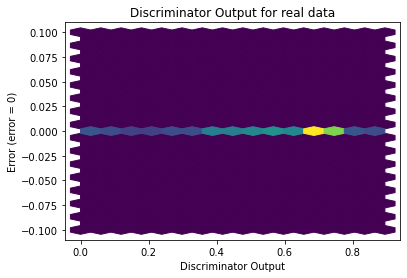

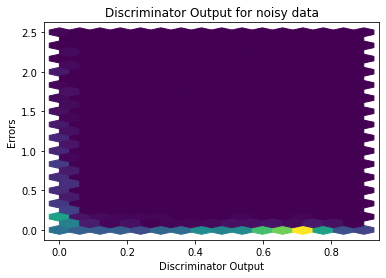

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


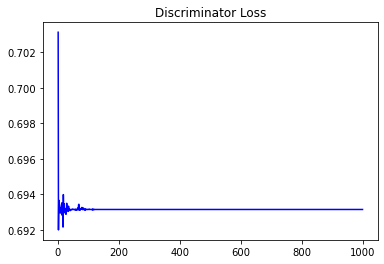

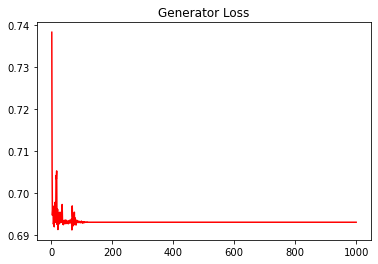

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.14207414391462678


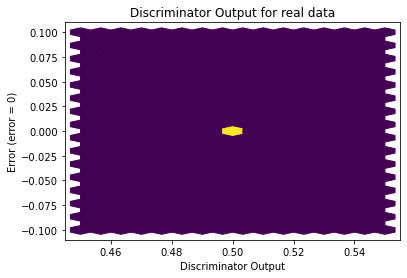

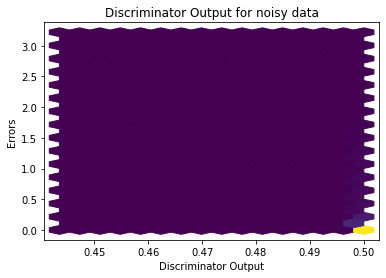

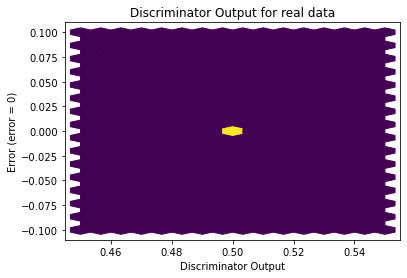

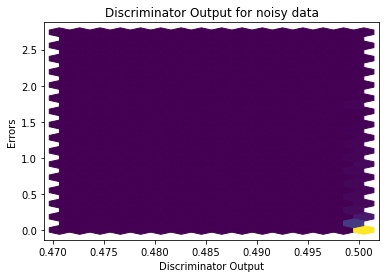

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


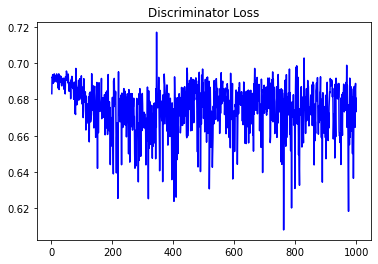

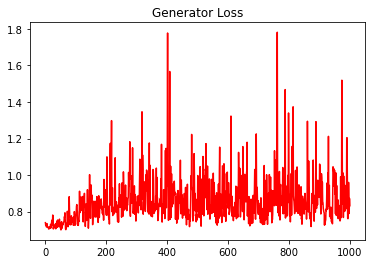

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.05220343709185526


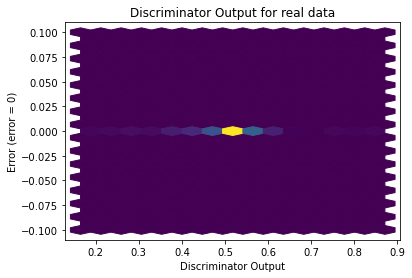

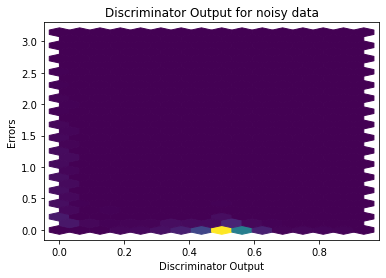

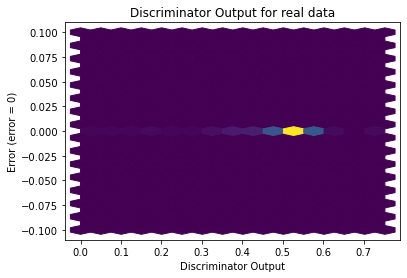

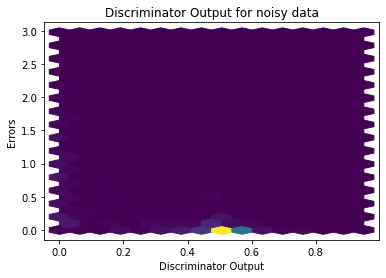

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4108]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2533]], requires_grad=True)
